# Explore here

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from dotenv import load_dotenv

# load the .env file variables
load_dotenv()



True

In [3]:
# Spotify API credentials
client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")

#Autenticacion de Spotify
auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
spotify = spotipy.Spotify(auth_manager=auth_manager)

In [ ]:
artist_id = "1WWezGDnjvHxS6DjIq9GjT"

# Seleccion de canciones mas populares

top_tracks = spotify.artist_top_tracks(artist_id)["tracks"]
track_data = [
    {
        "name": track["name"],
        "popularity": track["popularity"],
        "duration_min": track["duration_ms"] / 60000  # Convertir de ms a minutos
    }
    for track in top_tracks
]

In [5]:
## Convertir a DF

df = pd.DataFrame(track_data)

In [ ]:
# Ordenar por popularidad y mostrar el top 10
df_sorted = df.sort_values(by="popularity", ascending=True).head(10)
print(df_sorted)

                      name  popularity  duration_min
3   Perfecta (Bonus Track)          12      4.039600
9            Lo Tengo Todo          21      3.104167
8          Maison du Monde          22      3.421183
7                  El Café          23      3.586083
6                 Capitana          24      5.065833
5         Suenos Sencillos          25      3.546433
4  El Monstruo del Armario          26      4.964867
1                 Perfecta          27      4.032350
2      Relocos y Recuerdos          27      4.761000
0  ¿Qué Tal Si Me Adoptas?          43      2.883333


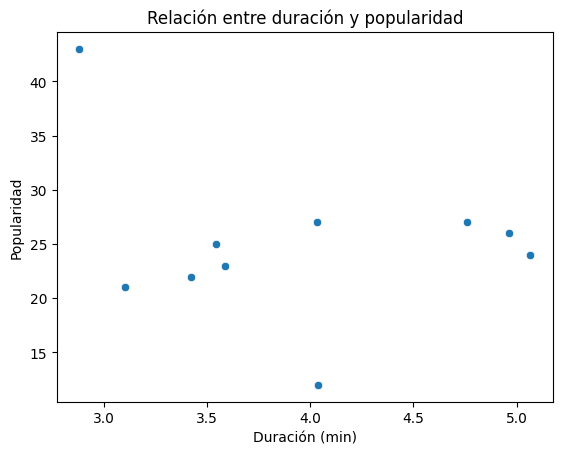

In [8]:
# Analizar relación entre duración y popularidad

sns.scatterplot(data=df, x="duration_min", y="popularity")
plt.xlabel("Duración (min)")
plt.ylabel("Popularidad")
plt.title("Relación entre duración y popularidad")
plt.show()